In [1]:
import os
import numpy as np
import pandas as pd

In [ ]:
# Please enter the output figure folder
fig_base = '../../../4_results/figures'

# save the figures ?
save_fig = True

# current convention
notebook_name, _  = os.path.splitext(os.path.basename(globals()['__vsc_ipynb_file__']))
fig_folder = os.path.join(fig_base, notebook_name)

if save_fig and not os.path.exists(fig_folder):
    print('Folder {} was created'.form(fig_folder))
    os.mkdir(fig_folder)

# BAPC

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx 
#import scienceplots

colors = ['#4C72B0', '#EB811B', '#14B03D', '#604C38']
sns.color_palette(sns.set_palette(sns.color_palette(colors)))

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.9215686274509803, 0.5058823529411764, 0.10588235294117647),
 (0.0784313725490196, 0.6901960784313725, 0.23921568627450981),
 (0.3764705882352941, 0.2980392156862745, 0.2196078431372549)]

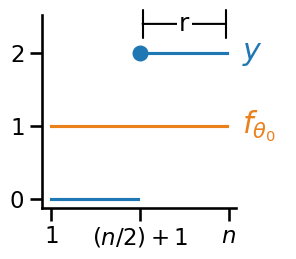

In [4]:
n_samples = 96
tast = 48
y = np.concatenate((np.zeros(tast), 2*np.ones(n_samples-tast)))
df = pd.DataFrame(y, columns=['y'])
df.index.name = 't'

n_train = df.shape[0]
look_back = int(n_train/2)
tast = 48
t = df.index.values

with sns.plotting_context("talk"):

    # first axis
    f, ax = plt.subplots(figsize=(2.5, 2.5))

    # data y
    ax.plot(t[:tast], df['y'].loc[:tast-1], color='tab:blue')
    ax.plot(t[tast:], df['y'].loc[tast:], color='tab:blue', label=r'$y$')
    ax.scatter(tast, df['y'].loc[tast], color='tab:blue', s=100)
    ax.plot(t, np.ones_like(t), color='#EB811B', label=r'$f_{\theta_0}$')

    # xticks
    xticks = np.array([0, tast, n_train])
    xlabels = [r'$1$', r'$(n/2) + 1$', r'$n$']
    ax.set_xticks(xticks, labels=xlabels)

    # yticks
    yticks = np.array([0, 1, 2])
    ylabels = [0, 1, 2]
    ax.set_yticks(yticks, labels=ylabels)

    # phantom ehat
    l = ax.plot(t, 1.5*np.ones_like(t), color='w', label=r'$-\widehat{\varepsilon}$')
    l[0].set_visible(False)
    matplotx.line_labels(ax=ax, fontsize='large')  # line labels to the right

    # window
    ax.plot(t, 2.4*np.ones_like(t), color='w')
    ht = 2.4
    x1 = tast
    x2 = n_train

    ax.annotate("", xy=(x1, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|', mutation_scale=10))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x1 + (x2-x1)/2, ht, "r", ha="center", va="center", bbox=bbox);

    sns.despine()

    # save figure
    if save_fig:
        fig_name = os.path.join(fig_folder, '1_bapc')
        plt.savefig(fig_name + '.png', dpi=300, bbox_inches='tight')

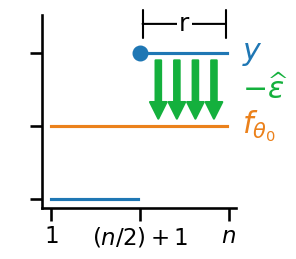

In [5]:
with sns.plotting_context("talk"):

    # first axis
    f, ax = plt.subplots(figsize=(2.5, 2.5))

    # data y
    ax.plot(t[:tast], df['y'].loc[:tast-1], color='tab:blue')
    ax.plot(t[tast:], df['y'].loc[tast:], color='tab:blue', label=r'$y$')
    ax.scatter(tast, df['y'].loc[tast], color='tab:blue', s=100)
    ax.plot(t, np.ones_like(t), color='#EB811B', label=r'$f_{\theta_0}$')

    # xticks
    xticks = np.array([0, tast, n_train])
    xlabels = [r'$1$', r'$(n/2) + 1$', r'$n$']
    ax.set_xticks(xticks, labels=xlabels)

    # yticks
    yticks = np.array([0, 1, 2])
    ylabels = [0, 1, 2]
    ax.set_yticks(yticks, labels=ylabels, color='w')

    # ehat
    l = ax.plot(t, 1.5*np.ones_like(t), color='#14B03D', label=r'$-\widehat{\varepsilon}$')
    l[0].set_visible(False)
    
    for i in range(tast+10, n_train, 10):
        ax.annotate('', xy=(t[i], 1), xytext=(t[i], df['y'].iloc[i]),
                        arrowprops=dict(edgecolor='#14B03D', facecolor='#14B03D',  shrink=0.1))

    # legend
    matplotx.line_labels(ax=ax, fontsize='large')  # line labels to the right

    # window
    ax.plot(t, 2.4*np.ones_like(t), color='w')
    ht = 2.4
    x1 = tast
    x2 = n_train

    ax.annotate("", xy=(x1, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|', mutation_scale=10))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x1 + (x2-x1)/2, ht, "r", ha="center", va="center", bbox=bbox);

    sns.despine()

    # save figure
    if save_fig:
        fig_name = os.path.join(fig_folder, '2_bapc')
        plt.savefig(fig_name + '.png', dpi=300, bbox_inches='tight')

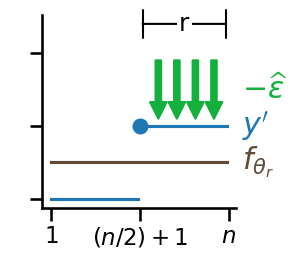

In [7]:
with sns.plotting_context("talk"):

    # first axis
    f, ax = plt.subplots(figsize=(2.5, 2.5))

    # data y
    ax.plot(t[:tast], 0.5*df['y'].loc[:tast-1], color='tab:blue')
    ax.plot(t[tast:], 0.5*df['y'].loc[tast:], color='tab:blue', label=r'$y^\prime$')
    ax.scatter(tast, 0.5*df['y'].loc[tast], color='tab:blue', s=100)
    ax.plot(t, 0.5*np.ones_like(t), color='#604C38', label=r'$f_{\theta_r}$')

    # xticks
    xticks = np.array([0, tast, n_train])
    xlabels = [r'$1$', r'$(n/2) + 1$', r'$n$']
    ax.set_xticks(xticks, labels=xlabels)

    # yticks
    yticks = np.array([0, 1, 2])
    ylabels = [0, 1, 2]
    ax.set_yticks(yticks, labels=ylabels, color='w')

    # ehat
    l = ax.plot(t, 1.5*np.ones_like(t), color='#14B03D', label=r'$-\widehat{\varepsilon}$')
    l[0].set_visible(False)
    
    for i in range(tast+10, n_train, 10):
        ax.annotate('', xy=(t[i], 1), xytext=(t[i], df['y'].iloc[i]),
                        arrowprops=dict(edgecolor='#14B03D', facecolor='#14B03D',  shrink=0.1))
        

    # legend
    matplotx.line_labels(ax=ax, fontsize='large')  # line labels to the right

    # window
    ax.plot(t, 2.4*np.ones_like(t), color='w')
    ht = 2.4
    x1 = tast
    x2 = n_train

    ax.annotate("", xy=(x1, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|', mutation_scale=10))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x1 + (x2-x1)/2, ht, "r", ha="center", va="center", bbox=bbox);

    sns.despine()

    # save figure
    if save_fig:
        fig_name = os.path.join(fig_folder, '3_bapc')
        plt.savefig(fig_name + '.png', dpi=300, bbox_inches='tight')

# SBAPC

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

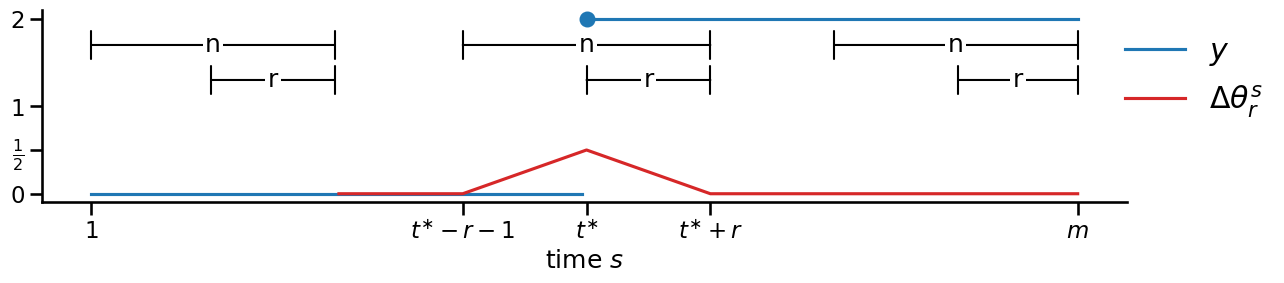

In [16]:
n_samples = 240
n_train = 60
look_back = 30
tast = 120
t = np.arange(n_samples)

y = np.concatenate((np.zeros(tast), 2*np.ones(n_samples-tast)))
df = pd.DataFrame(y, columns=['y'])
df.index.name = 't'

y = np.full(np.shape(t), np.nan)
y[n_train:tast-look_back] = 0
y[tast-look_back:tast] = 0.5 * (t[tast-look_back:tast] - tast + look_back) /(look_back)
y[tast:tast+look_back] = 0.5 * (-t[tast:tast+look_back] + tast + look_back) /(look_back)
y[tast+look_back:] = 0

with sns.plotting_context("talk"):
    
    f, ax = plt.subplots(1, 1, figsize=(14, 2.5), sharex=True)

    ax.plot(t[:tast], df['y'].loc[:tast-1], color='tab:blue', label=r'$y$')
    ax.plot(t[tast:], df['y'].loc[tast:], color='tab:blue')
    ax.scatter(tast, df['y'].loc[tast], color='tab:blue', s=100)
    ax.plot(t, y, color='tab:red', label=r'$\Delta \theta_r^s$')

    xi = 0
    x0 = tast - look_back 
    x1 = tast
    x2 = tast + look_back
    xf =  len(t)-1
    xticks = np.array([xi, x0, x1, x2, xf])
    xlabels = ['1', r'$t^{\ast}-r-1$', r'$t^{\ast}$', r'$t^{\ast}+r$', r'$m$']
    ax.set_xticks(xticks, labels=xlabels)
    ax.set_xlabel(r'time $s$')
    yticks = np.array([0, 0.5, 1, 2])
    ylabels = [0, r'$\frac{1}{2}$', 1, 2]
    ax.set_yticks(yticks,labels=ylabels)

    # second window
    ht = 1.7
    ax.annotate("", xy=(x0, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|',mutation_scale=10, shrinkA=0, shrinkB=0))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x0 + (x2-x0)/2, ht, "n", ha="center", va="center", bbox=bbox);

    ht = 1.3
    ax.annotate("", xy=(x1, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|',mutation_scale=10, shrinkA=0, shrinkB=0))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x1 + (x2-x1)/2, ht, "r", ha="center", va="center", bbox=bbox);

    # legend outside right
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0), frameon=False, fontsize='large')

    # first window
    x0 = 0
    x1 = look_back - 1
    x2 = n_train - 1
    ht = 1.7
    ax.annotate("", xy=(x0, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|',mutation_scale=10, shrinkA=0, shrinkB=0))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x0 + (x2-x0)/2, ht, "n", ha="center", va="center", bbox=bbox);

    ht = 1.3
    ax.annotate("", xy=(x1, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|',mutation_scale=10, shrinkA=0, shrinkB=0))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x1 + (x2-x1)/2, ht, "r", ha="center", va="center", bbox=bbox);


    # third window
    x0 = len(t) - n_train
    x1 = len(t) - look_back 
    x2 = len(t) - 1
    ht = 1.7
    ax.annotate("", xy=(x0, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|',mutation_scale=10, shrinkA=0, shrinkB=0))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x0 + (x2-x0)/2, ht, "n", ha="center", va="center", bbox=bbox);

    ht = 1.3
    ax.annotate("", xy=(x1, ht), xytext=(x2, ht), textcoords=ax.transData, arrowprops=dict(arrowstyle='|-|',mutation_scale=10, shrinkA=0, shrinkB=0))
    bbox=dict(fc="white", ec="none", boxstyle="square,pad=0.1")
    ax.text(x1 + (x2-x1)/2, ht, "r", ha="center", va="center", bbox=bbox);

    sns.despine()

    if save_fig:
        fig_name = os.path.join(fig_folder, 'seqbapc.png')
        plt.savefig(fig_name, bbox_inches='tight', dpi=300)

# Legends

In [9]:
import os
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns

Legend ../../../4_results/figures\3_1_additional_figures\legend_1.png was saved


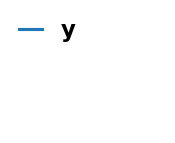

In [10]:
label1 = r'$\bf{y}$'
label2 = r'$\bf{f_{\theta_r}}$'
label3 = r'$\bf{f_{\theta_0} + \Delta f_r}$'

with sns.plotting_context("talk"):
       
       legend_elements = [Line2D([0], [0], color='tab:blue', label=label1),
                          Line2D([0], [0], color='w', label=label2), 
                          Line2D([0], [0], color='w', label=label3)]
       

       fig_legend = plt.figure(figsize=(0.75, 1.25))
       ax_legend = fig_legend.add_subplot(111)

       legend = ax_legend.legend(handles=legend_elements, 
                                 loc='center', 
                                 frameon=False,
                                 handlelength=1)
       ax_legend.axis('off')      

       for text in legend.get_texts():
              if text.get_text() in [label2, label3]:
                     text.set_color("w") 

       if save_fig: 

              # Save the legend as a PNG file
              legend_name = os.path.join(fig_folder, 'legend_1.png')
              fig_legend.savefig(legend_name, bbox_inches='tight', dpi=300)
              print(f'Legend {legend_name} was saved') 

Legend ../../../4_results/figures\3_1_additional_figures\legend_2.png was saved


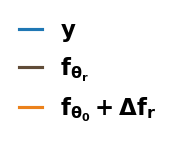

In [11]:

# From metropolis.mplstyle
colors = ['#4C72B0', '#EB811B', '#14B03D', '#604C38']
palette = sns.color_palette(sns.set_palette(sns.color_palette(colors)))
c3 = palette[1]
c4 = palette[3]

label1 = r'$\bf{y}$'
label2 = r'$\bf{f_{\theta_r}}$'
label3 = r'$\bf{f_{\theta_0} + \Delta f_r}$'

with sns.plotting_context("talk"):
       
       legend_elements = [Line2D([0], [0], color='tab:blue', label=label1),
                          Line2D([0], [0], color='#604C38', label=label2), 
                          Line2D([0], [0], color='#EB811B', label=label3)]
       

       fig_legend = plt.figure(figsize=(0.75, 1.25))
       ax_legend = fig_legend.add_subplot(111)

       legend = ax_legend.legend(handles=legend_elements, 
                            loc='center', 
                            frameon=False,
                            handlelength=1)
       ax_legend.axis('off')  

       if save_fig:    

              # Save the legend as a PNG file
              legend_name = os.path.join(fig_folder, 'legend_2.png')
              fig_legend.savefig(legend_name, bbox_inches='tight', dpi=300)
              print(f'Legend {legend_name} was saved') 

# Bottom